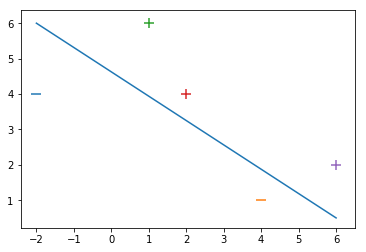

In [5]:
#To help us perform math operations
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline
#Step 1 - Define our data
#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
[-2,4,-1],
[4,1,-1],
[1, 6, -1],
[2, 4, -1],
[6, 2, -1],
])
#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])
#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

In [8]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes
def svm_sgd_plot(X, Y):
    w = np.zeros(len(X[0])) #Initialize our SVMs weight vector with zeros (3 values)
    eta = 1 #The learning rate
    epochs = 100000 #how many iterations to train for #store misclassifications so we can plot how they change over time
    errors = []
    for epoch in range(1,epochs): #training part, gradient descent part
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1: #misclassification
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) ) #misclassified update for ours weights
                error = 1
            else: #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
            errors.append(error)

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    return w

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


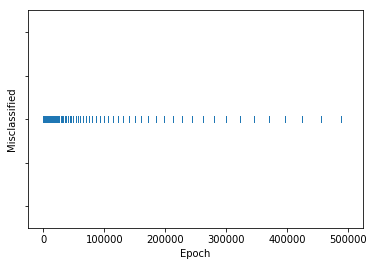

array([ 1.58876117,  3.17458055, 11.11863105])

In [9]:
svm_sgd_plot(X, y)